In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
raw_df = pd.read_csv("new_jan_1.csv")

In [5]:
df = raw_df

In [6]:
cols = list(df.columns)
cols.remove('trip_total')

In [7]:
df.head()

,taxi_id,trip_seconds,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_minuate,trip_km
0,85.0,180.0,4.50,0.0,0.0,0.0,4.50,199.0,510.0,199.0,510.0,3.0,0.643700
1,4237.0,480.0,7.00,0.0,0.0,0.0,7.00,686.0,500.0,686.0,500.0,8.0,1.770300
2,1987.0,1080.0,17.75,0.0,0.0,0.0,17.75,599.0,346.0,660.0,120.0,18.0,9.977900
3,6400.0,60.0,3.75,0.0,0.0,0.0,3.75,527.0,24.0,527.0,24.0,1.0,0.321900
4,7418.0,180.0,5.00,2.0,0.0,1.5,8.50,210.0,470.0,744.0,605.0,3.0,1.001646


# X_변수 정의

In [12]:
X = df[cols]
y = df['trip_total']

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### 2-1. 모델생성

#### 2-1-1) 기본 옵션으로 모델 생성

In [15]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(X_train, y_train)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(X_test,y_test)))

Score on training set : 0.998
Score on test set : 0.992


# Feature Selection

In [16]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = list(X.columns)
df_importance['Importance'] = rf_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3).head(20)

,Feature,Importance
2,fare,0.581
5,extras,0.408
3,tips,0.003
11,trip_km,0.002
4,tolls,0.001
8,dropoff_latitude,0.001
9,dropoff_longitude,0.001
6,pickup_latitude,0.001
1,trip_seconds,0.001
7,pickup_longitude,0.000


Text(0, 0.5, '변수')

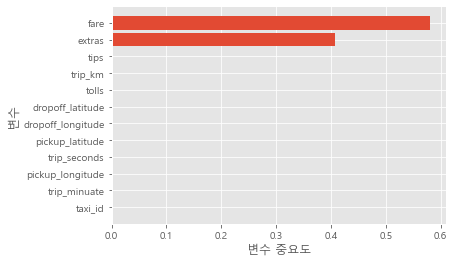

In [17]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(15)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

- 가격에 대한 변수 중요도를 살펴보면 fare, extras가 전체 요금에 대해 가장 중요한 변수로 나타난다.
- trip_km과 같은 거리 변수는 이상치 등의 특이한 경우가 많아 요금에 영향을 주지 않는것으로 해석된다.

In [20]:
# 불필요 변수 제거
df1 = df.drop(['taxi_id', 'trip_seconds', 'pickup_latitude', 
               'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'],
              axis=1)

In [22]:
cols = list(df1.columns)
cols.remove('trip_total')

X = df1[cols]
y = df1['trip_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(X_train, y_train)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(X_test,y_test)))

Score on training set : 1.000
Score on test set : 0.986


Text(0, 0.5, '변수')

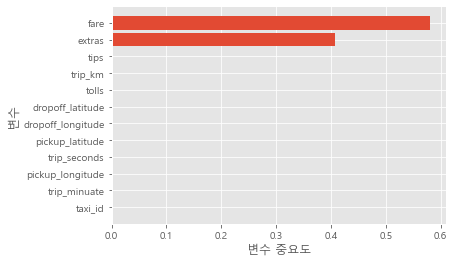

In [23]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(15)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# trip_km에 대한 변수 선택

In [24]:
cols = list(df1.columns)
cols.remove('trip_km')

X = df1[cols]
y = df1['trip_km']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(X_train, y_train)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(X_test,y_test)))

Score on training set : 0.481
Score on test set : -0.166


Text(0, 0.5, '변수')

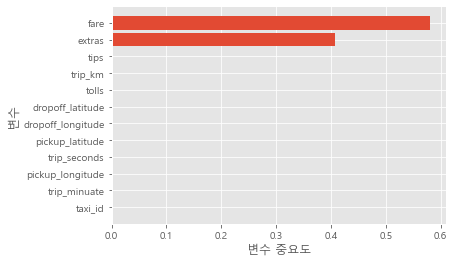

In [25]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(15)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')